In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
books = pd.read_csv('../data/books.csv')

In [3]:
# language, category, summary에 결측값 존재
books.isnull().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
dtype: int64

#### Lanugage & Summary NULL 행 공유
#### Category는 거기에 더해서 추가로 NULL 행 존재

In [4]:
# language가 null이면서 summary가 null이 아닌 경우는 없음
# -> 하나가 null이면 다른 하나도 null
display(books[books['language'].isnull() & books['summary'].notnull()])
display(books[books['language'].notnull() & books['summary'].isnull()])


,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [5]:
# language가 null이면서 category가 null이 아닌 경우는 없음
# 그 반대는 아님
display(books[books['language'].isnull() & books['category'].notnull()])
display(books[books['language'].notnull() & books['category'].isna()])

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
138,2070567842,Folio Junior: L'histoire De Monsieur Sommer,Su>skind-Sempe,1994.0,Gallimard-Jeunesse,http://images.amazon.com/images/P/2070567842.0...,fr,NaN,Un petit garçon se pose énormément de question...,images/2070567842.01.THUMBZZZ.jpg
193,3596292646,Das Buch der lÃ?Â¤cherlichen Liebe.,Milan Kundera,2000.0,"Fischer (Tb.), Frankfurt",http://images.amazon.com/images/P/3596292646.0...,de,NaN,Die im &#39;Buch der lächerlichen Liebe&#39; v...,images/3596292646.01.THUMBZZZ.jpg
486,0871131811,Zodiac: The Eco-Thriller,Neal Stephenson,1988.0,Pub Group West,http://images.amazon.com/images/P/0871131811.0...,en,NaN,"Sangamon Taylor, an environmental extremist, s...",images/0871131811.01.THUMBZZZ.jpg
880,067144378X,SABLE MOON,Nancy Springer,1981.0,Pocket,http://images.amazon.com/images/P/067144378X.0...,en,NaN,Seventeen-year-old Prince Trevyn must save the...,images/067144378X.01.THUMBZZZ.jpg
1001,0345339711,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986.0,Del Rey,http://images.amazon.com/images/P/0345339711.0...,en,NaN,"Thus continues the magnificent, bestselling ta...",images/0345339711.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
149252,3770401697,"Lucky Luke, Bd.58, Die Geister-Ranch und ander...",Michel Janvier,1989.0,"Egmont Ehapa, Berlin",http://images.amazon.com/images/P/3770401697.0...,de,NaN,"Enth. noch: Die Hellseherin, Die Statue und Di...",images/3770401697.01.THUMBZZZ.jpg
149307,0806917695,Perplexing Lateral Thinking Puzzles: Scholasti...,Paul Sloane,1997.0,Sterling Publishing,http://images.amazon.com/images/P/0806917695.0...,en,NaN,"Normal situations veer off into the bizarre, c...",images/0806917695.01.THUMBZZZ.jpg
149329,3426192543,Im FrÃ?Â¼hling singt zum letztenmal die Lerche.,Johannes Mario Simmel,1990.0,Droemer Knaur,http://images.amazon.com/images/P/3426192543.0...,de,NaN,Eine Gruppe von Idealisten nimmt den Kampf geg...,images/3426192543.01.THUMBZZZ.jpg
149441,2253054615,Le maharani,Gita Mehta,1990.0,LGF,http://images.amazon.com/images/P/2253054615.0...,fr,NaN,Elevée à la cour comme toutes les maharani l&#...,images/2253054615.01.THUMBZZZ.jpg


#### isbn 열과 img_path, img_url 열의 isbn은 모든 행에 대해 잘 연동되어 있음

In [6]:
books[books['isbn'] != books['img_url'].apply(lambda x: x.split('P/')[1][:10])]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [8]:
# 'isbn'에 있는 isbn과 'img_path'에 있는 isbn은 모든 데이터에 대해 동일

# img path 형식이 미션이랑 다름?
# 미션: books[books['isbn']!=books['img_path'].apply(lambda x: x.split('___')[2][:10])]

books[books['isbn'] != books['img_path'].apply(lambda x: x.split('/')[1][:10])]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


## book_title

요약:

- 약 7.5%의 범주가 2개 이상의 데이터 (동일 타이틀 책)
- 제목만 같은 게 아니라, 동일한 서적이라고 판단되면 특정 범주형 feature들을 통합할 수 있어 보임
- 표기법의 차이, Nan 값 대체 등등..
- 단, 미션에서 나온 것처럼 language는 다른 국가에 출판 됐을 가능성을 고려해봐야 함

In [9]:
print('전체 데이터 개수:', books.shape[0])
print('book_title 범주 개수:', len(books['book_title'].value_counts() > 1))
print('title이 중복되는 book_title 범주 개수:',sum(books['book_title'].value_counts() > 1))
print('비율:', round(sum(books['book_title'].value_counts() > 1) / len(books['book_title'].value_counts() > 1), 3))

전체 데이터 개수: 149570
book_title 범주 개수: 135436
title이 중복되는 book_title 범주 개수: 10155
비율: 0.075


In [10]:
books['book_title'].value_counts()[:20]

book_title
The Secret Garden                                         18
Selected Poems                                            16
Adventures of Huckleberry Finn                            15
Dracula                                                   15
Beloved                                                   14
Wuthering Heights                                         14
Pride and Prejudice                                       14
Little Women                                              14
Jane Eyre                                                 14
The Hobbit                                                12
The Gift                                                  11
The Wedding                                               11
Frankenstein                                              10
The Night Before Christmas                                10
Emma                                                      10
Masquerade                                                10
Carrie       

In [11]:
# 제목만 같은 게 아니라, 동일한 서적이라고 판단되면 특정 범주형 feature들을 통합할 수 있어 보임
# 표기법의 차이, Nan 값 대체 등등..
# 단, 미션에서 나온 것처럼 language는 다른 국가에 출판 됐을 가능성을 고려해봐야 함

books[books['book_title'] == 'The Secret Garden']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
5098,0812505018,The Secret Garden,Frances Hodgson Burnett,1989.0,Tor Books,http://images.amazon.com/images/P/0812505018.0...,en,['Fiction'],"An orphan, sent from India to England to live ...",images/0812505018.01.THUMBZZZ.jpg
11516,0590433466,The Secret Garden,Frances H. Burnett,1997.0,Scholastic,http://images.amazon.com/images/P/0590433466.0...,NaN,NaN,NaN,images/0590433466.01.THUMBZZZ.jpg
13601,006440188X,The Secret Garden,Frances Hodgson Burnett,1998.0,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,en,['Juvenile Fiction'],&quot;One of th&#39; gardens is locked up.,images/006440188X.01.THUMBZZZ.jpg
20350,0440977096,The Secret Garden,Frances Hodgson Burnett,1989.0,Laure Leaf,http://images.amazon.com/images/P/0440977096.0...,en,['Juvenile Fiction'],Ten-year-old Mary comes to live in a lonely ho...,images/0440977096.01.THUMBZZZ.jpg
22930,0879236493,The Secret Garden,Frances Hodgson Burnett,1987.0,David R. Godine Publisher,http://images.amazon.com/images/P/0879236493.0...,en,['Juvenile Fiction'],The robin helps Mary find the door to the secr...,images/0879236493.01.THUMBZZZ.jpg
37322,0590471724,The Secret Garden,M.J. Carr,1993.0,Scholastic Paperbacks (Mm),http://images.amazon.com/images/P/0590471724.0...,en,['Gardens'],A young orphan discovers a whole new world whe...,images/0590471724.01.THUMBZZZ.jpg
51248,055321201X,The Secret Garden,Frances H. Burnett,1987.0,Bantam,http://images.amazon.com/images/P/055321201X.0...,en,['Juvenile Fiction'],Ten-year-old Mary comes to live in a lonely ho...,images/055321201X.01.THUMBZZZ.jpg
51414,0439099390,The Secret Garden,Frances Hodgson Burnett,1999.0,Scholastic,http://images.amazon.com/images/P/0439099390.0...,en,['Juvenile Fiction'],A ten-year-old orphan comes to live in a lonel...,images/0439099390.01.THUMBZZZ.jpg
55931,0440777062,The Secret Garden,Frances Hodgson Burnett,1979.0,Dell Publishing,http://images.amazon.com/images/P/0440777062.0...,en,['Children with disabilities'],Ten-year-old Mary comes to live in a lonely ho...,images/0440777062.01.THUMBZZZ.jpg
59876,0451525817,The Secret Garden,Frances Hodgson Burnett,1994.0,Signet Classics,http://images.amazon.com/images/P/0451525817.0...,en,['Gardens'],When Mary Lennox&#39;s parents die from choler...,images/0451525817.01.THUMBZZZ.jpg


In [12]:
books[books['book_title'] == 'Selected Poems']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
6555,081120958X,Selected Poems,William Carlos Williams,1985.0,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,en,['Poetry'],Offers a collection of poems along with notes ...,images/081120958X.01.THUMBZZZ.jpg
21476,0670809179,Selected Poems,John Ashbery,1985.0,Penguin USA,http://images.amazon.com/images/P/0670809179.0...,en,['Poetry'],A collection of works by the Pulitzer Prize-wi...,images/0670809179.01.THUMBZZZ.jpg
36667,0811201465,Selected Poems,K. Patchen,1957.0,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,NaN,NaN,NaN,images/0811201465.01.THUMBZZZ.jpg
37957,0679750800,Selected Poems,Rita Dove,1993.0,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,en,['Poetry'],"Gathers poems about slavery and freedom, home ...",images/0679750800.01.THUMBZZZ.jpg
68491,0060931744,Selected Poems,Gwendolyn Brooks,1999.0,Perennial,http://images.amazon.com/images/P/0060931744.0...,NaN,NaN,NaN,images/0060931744.01.THUMBZZZ.jpg
74088,0517101548,Selected Poems,John Donne,1994.0,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,NaN,NaN,NaN,images/0517101548.01.THUMBZZZ.jpg
78550,1550651498,Selected Poems,Ralph Gustafson,2001.0,Vehicule Press,http://images.amazon.com/images/P/1550651498.0...,en,['Poetry'],&quot;Ralph was an infinitely wise poet.&quot;...,images/1550651498.01.THUMBZZZ.jpg
80816,0802151027,Selected Poems,Pablo Neruda,1961.0,Grove Press,http://images.amazon.com/images/P/0802151027.0...,NaN,NaN,NaN,images/0802151027.01.THUMBZZZ.jpg
86268,0156003961,Selected Poems,Carl Sandburg,1996.0,Harvest Books,http://images.amazon.com/images/P/0156003961.0...,en,['Poetry'],A collection of 166 previously unpublished and...,images/0156003961.01.THUMBZZZ.jpg
92621,0333516265,Selected Poems,Thomas Hardy,1989.0,Macmillan,http://images.amazon.com/images/P/0333516265.0...,NaN,NaN,NaN,images/0333516265.01.THUMBZZZ.jpg


## book_author

요약:
- 'x x', 'tk', 'unknown' 등 의미를 알기 힘든 범주 존재 (각 데이터는 1~5개 정도)
- 범주가 총 62059개인데, 2개 이하 범주 51342개, 1개 이하 범주 43030개


In [13]:
books['book_author'].sort_values(ascending=False)[:50]

106992                                Ã?Â?pictÃ?Â¨te
79938                         Ã?Â?dÃ?Â¶n von Horvath
91117                            Ã?dÃ¶n von HorvÃ¡th
83635                            Ã?dÃ¶n von HorvÃ¡th
139657                                Â¢ystein LÂ²nn
127512                                           x x
107288                                           x x
143992                                           x x
114051                                           x x
96680                                     von Welser
42947                                victor Kelleher
2292                                 various authors
76167                                    van Woerden
92839                                       van Dale
23356                                        unknown
54624                     translated by Rumer Godden
91380                                             tk
142632                                            tk
146864                the editors of Time-Life

In [14]:
# 출판사마다 book_author의 null 표기법이 다른 느낌?
books[books['book_author'] == 'x x']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
107288,1591050804,Winter Fire,x x,2002.0,"NovelBooks, Inc.",http://images.amazon.com/images/P/1591050804.0...,NaN,NaN,NaN,images/1591050804.01.THUMBZZZ.jpg
114051,1931696810,Mating Season,x x,2002.0,"NovelBooks, Inc.",http://images.amazon.com/images/P/1931696810.0...,NaN,NaN,NaN,images/1931696810.01.THUMBZZZ.jpg
127512,1591050367,An American Redneck in Hong Kong,x x,2002.0,"NovelBooks, Inc.",http://images.amazon.com/images/P/1591050367.0...,en,['Fiction'],I suppose we&#39;ll find out. AN AMERICAN REDN...,images/1591050367.01.THUMBZZZ.jpg
143992,1931696837,Unlawful,x x,2002.0,"NovelBooks, Inc.",http://images.amazon.com/images/P/1931696837.0...,NaN,NaN,NaN,images/1931696837.01.THUMBZZZ.jpg


In [15]:
books[books['book_author'] == 'unknown']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
23356,1561449164,Pound It (Popular Mechanics for Kids),unknown,1997.0,Modern Publishing,http://images.amazon.com/images/P/1561449164.0...,NaN,NaN,NaN,images/1561449164.01.THUMBZZZ.jpg


In [16]:
# 둘다 Disney?
books[books['book_author'] == 'tk']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
91380,0786845848,The Lizzie McGuire Movie: Jr. Novel,tk,2003.0,Disney Press,http://images.amazon.com/images/P/0786845848.0...,en,['Juvenile Fiction'],"In this movie tie-in edition, graduating from ...",images/0786845848.01.THUMBZZZ.jpg
142632,0786832533,Disney's Classic Mickey (Eye Novels),tk,1999.0,Disney Editions,http://images.amazon.com/images/P/0786832533.0...,NaN,NaN,NaN,images/0786832533.01.THUMBZZZ.jpg


In [17]:
books[books['book_author'] == 'ky']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
83925,349920360X,HeiÃ?Â?t du wirklich Hassan Schmidt? Ein Krimi...,ky,1997.0,Rowohlt Tb.,http://images.amazon.com/images/P/349920360X.0...,NaN,NaN,NaN,images/349920360X.01.THUMBZZZ.jpg


In [18]:
books['book_author'].value_counts()

book_author
Stephen King            446
Agatha Christie         404
William Shakespeare     381
Barbara Cartland        283
Nora Roberts            241
                       ... 
Steven Gillis             1
Robin Stevenson           1
Allen Wyatt               1
Merilyn Simonds Mohr      1
Mapsco                    1
Name: count, Length: 62058, dtype: int64

In [19]:
# 범주가 총 62059개인데, 51342개가 포함 데이터 2개 이하, 43030개가 포함 데이터 1개 이하
print(len(books['book_author'].value_counts()) - list(books['book_author'].value_counts()).index(2))
print(len(books['book_author'].value_counts()) - list(books['book_author'].value_counts()).index(1))

51341
43029


## year_of_publication

요약:
- type이 float로 되어있는 거 보면 숫자가 아닌 이상한 값이 들어간 경우는 없는 듯
- 결측값 없음
- 1300년대 2권, 1800년대 1권 있음
- 99%가 1970년대 이후 서적

In [20]:
# 결측 없음
books['year_of_publication'].isnull().sum()

0

<Axes: xlabel='year_of_publication', ylabel='Count'>

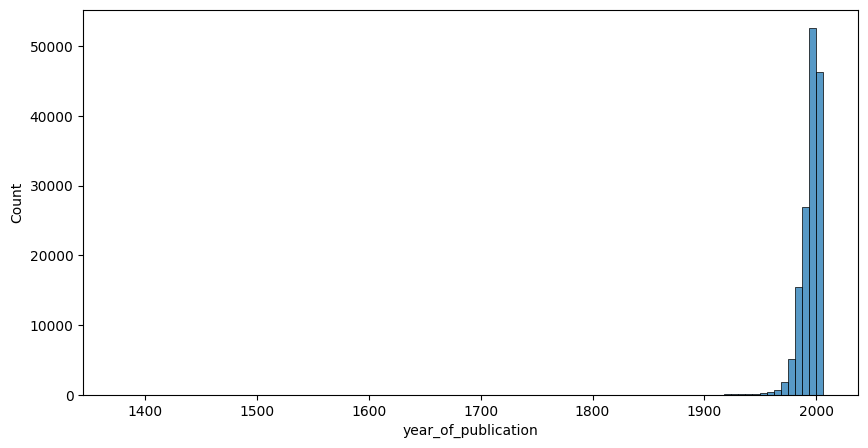

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(books['year_of_publication'], bins=100)

In [22]:
# 1300년대 2권, 1800년대 1권 존재
books['year_of_publication'].sort_values()[:20]

121860    1376.0
104259    1378.0
129205    1806.0
97563     1900.0
132721    1901.0
135763    1901.0
139389    1901.0
111464    1901.0
65809     1902.0
129438    1902.0
41101     1904.0
128711    1906.0
106561    1908.0
76872     1911.0
41007     1911.0
122687    1911.0
129523    1911.0
122688    1911.0
139255    1911.0
137695    1911.0
Name: year_of_publication, dtype: float64

In [23]:
# 정보 거의 없음
books[books['year_of_publication'] == 1376]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
121860,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,NaN,NaN,NaN,images/964442011X.01.THUMBZZZ.jpg


In [24]:
books[books['year_of_publication'] == 1378]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
104259,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,fa,['Fantasy fiction'],"Mahnaz, the only daughter of a traditional ari...",images/9643112136.01.THUMBZZZ.jpg


In [25]:
books[books['year_of_publication'] == 1806]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
129205,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806.0,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.0...,en,NaN,Bonded Leather binding,images/0781228956.01.THUMBZZZ.jpg


In [26]:
# 미션에 나온 것처럼 대부분이 1970년 이후 책들임
# 99% 이상이 1970년 이후 책
print(books[books['year_of_publication'] < 1970].shape[0])
print(books[books['year_of_publication'] >= 1970].shape[0])
print('1970년 미만 비율:', round(books[books['year_of_publication'] < 1970].shape[0] / books.shape[0], 3))

1466
148104
1970년 미만 비율: 0.01


## publisher

요약:
- 거의 절반이 데이터를 하나만 가지고 있는 범주임, 미션처럼 전처리가 필요해보임 (펭귄 통합한 것처럼)

ISBN 참고

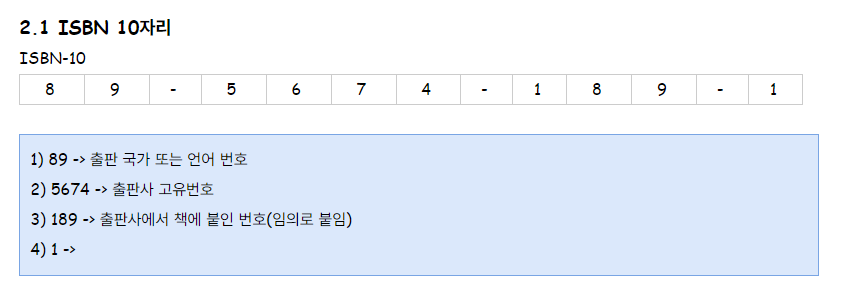

In [41]:
books['isbn'].str[2:6].value_counts()

isbn
5166    562
7322    560
5326    509
5357    430
5152    423
       ... 
0765      1
7573      1
9743      1
3767      1
0776      1
Name: count, Length: 7712, dtype: int64

In [43]:
books[books['isbn'].str[2:6] == '5166']

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high
493,1551660237,Tiger Prince,Kenneth T. Brown,1994.0,Mira,http://images.amazon.com/images/P/1551660237.0...,en,Fiction,Tiger Prince by Sandra Brown released on Sep 2...,images/1551660237.01.THUMBZZZ.jpg,NaN
494,155166500X,Independent Wife (Calhoun Women),Linda Howard,1999.0,Mira,http://images.amazon.com/images/P/155166500X.0...,en,Fiction,An Independent Wife by Linda Howard released o...,images/155166500X.01.THUMBZZZ.jpg,NaN
495,1551667894,Four Seasons,Mary Alice Monroe,2001.0,Mira,http://images.amazon.com/images/P/1551667894.0...,NaN,NaN,NaN,images/1551667894.01.THUMBZZZ.jpg,NaN
1238,1551660016,The Devil's Own,Sandra Brown,1994.0,Mira Books,http://images.amazon.com/images/P/1551660016.0...,en,Fiction,Targeting a man whose tough exterior had kept ...,images/1551660016.01.THUMBZZZ.jpg,NaN
1291,1551668785,Final Stand,Helen Myers,2002.0,Mira,http://images.amazon.com/images/P/1551668785.0...,en,Fiction,Final Stand by Helen R. Myers released on Jan ...,images/1551668785.01.THUMBZZZ.jpg,NaN
...,...,...,...,...,...,...,...,...,...,...,...
145954,1551665905,Last Lover (Hardcover) (Mira),Laura Van Wormer,2000.0,Mira,http://images.amazon.com/images/P/1551665905.0...,en,Fiction,The Last Lover by Laura Van Wormer released on...,images/1551665905.01.THUMBZZZ.jpg,NaN
146845,1551660806,Playboy And The Widow,Debbie Macomber,1996.0,Mira,http://images.amazon.com/images/P/1551660806.0...,en,Fiction,"A confirmed bachelor, Cliff wasn&#39;t prepare...",images/1551660806.01.THUMBZZZ.jpg,NaN
147840,1551669765,"Promise, Texas",Debbie Macomber,2003.0,Mira,http://images.amazon.com/images/P/1551669765.0...,NaN,NaN,NaN,images/1551669765.01.THUMBZZZ.jpg,NaN
148436,1551667584,The Firebrand,Susan Wiggs,2003.0,Mira,http://images.amazon.com/images/P/1551667584.0...,NaN,NaN,NaN,images/1551667584.01.THUMBZZZ.jpg,NaN


In [27]:
# 결측 없음
books['publisher'].isnull().sum()

0

In [28]:
# 절반 정도의 범주가 데이터를 1개만 가지고 있음
# 미션에서 Penguin Books를 통합한 것처럼 전처리 필요해보임

print(sum(books['publisher'].value_counts() > 1))
print(sum(books['publisher'].value_counts() == 1))

5276
6295


In [29]:
books['publisher'].value_counts()[:20]

publisher
Harlequin                   3005
Ballantine Books            2322
Pocket                      2274
Penguin Books               1943
Bantam Books                1938
Berkley Publishing Group    1754
Silhouette                  1684
Warner Books                1667
Scholastic                  1586
Simon & Schuster            1578
Signet Book                 1332
Penguin USA                 1315
Harpercollins               1303
Bantam                      1217
Avon                        1185
Fawcett Books               1146
Random House Inc            1098
Vintage Books USA           1095
Tor Books                   1092
St. Martin's Press          1065
Name: count, dtype: int64

## category

요약:
- 범주별로 rating의 평균이 어느정도 차이가 있어보임


In [30]:
# 카테고리에 있는 대괄호 제거
books.loc[books[books['category'].notnull()].index, 'category'] = books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())

In [31]:
# 카테고리 수 줄이기
categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india']

for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

In [32]:
category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category','count']
category_high_df.head(10)

,category,count
0,fiction,2342
1,language,200
2,literature,161
3,poetry,155
4,humor,102
5,drama,68
6,children,66
7,adventure,53
8,psycholog,34
9,music,33


In [33]:
# 5개 이하인 항목은 others로 묶어주도록 하겠습니다.
others_list = category_high_df[category_high_df['count']<5]['category'].values
books.loc[books[books['category_high'].isin(others_list)].index, 'category_high']='others'

In [34]:
train_ratings = pd.read_csv('../data/train_ratings.csv')
test_ratings = pd.read_csv('../data/test_ratings.csv')

In [35]:
train_ratings

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9
...,...,...,...
306790,278843,0743525493,7
306791,278851,067161746X,6
306792,278851,0884159221,7
306793,278851,0912333022,7


In [36]:
books_add_ratings = books.join(train_ratings.set_index('isbn'), on='isbn')
books_add_ratings.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path,category_high,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,Actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN,8.0,4.0
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,Actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN,67544.0,7.0
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,Actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN,123629.0,8.0
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,Actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN,200273.0,8.0
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,Actresses,"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg,NaN,210926.0,9.0


In [37]:
books_add_ratings.groupby('category_high')['rating'].mean()

category_high
adventure     6.657143
animal        7.270270
business      4.454545
camp          8.428571
children      7.010000
computer      6.428571
cook          7.684211
criminal      6.875000
disease       6.950000
drama         7.166667
ecology       7.666667
family        5.500000
fiction       7.249581
garden        8.375000
house         7.227273
humor         6.627119
language      6.889908
literature    6.897233
music         6.516129
others        7.913043
photograph    8.900000
poetry        7.597938
psycholog     6.523438
religion      8.500000
science       7.608696
travel        6.906250
Name: rating, dtype: float64

In [38]:
books_add_ratings['category_high'].value_counts()

category_high
fiction       3930
literature     272
language       251
poetry         216
humor          192
psycholog      130
drama          125
children       109
adventure       80
animal          41
music           39
travel          34
others          26
science         24
house           23
cook            21
disease         20
camp            15
family          14
business        13
photograph      11
garden          10
criminal         8
ecology          8
computer         7
religion         6
Name: count, dtype: int64